In [1]:
# Titanic Dataset - Exploratory Data Analysis (EDA)
## 1. Objective
## 2. Dataset Description
## 3. Data Loading
## 4. Initial Inspection
## 5. Data Cleaning
## 6. Univariate Analysis
## 7. Bivariate Analysis
## 8. Multivariate Analysis
## 9. Summary of Findings


In [2]:
!pip install pandas numpy matplotlib seaborn missingno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

In [4]:
df = pd.read_csv("train.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

Please upload the `train.csv` file when prompted after running the following cell.

In [5]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [8]:
import pandas as pd
import io

# Assuming the uploaded file is named 'train.csv'
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')))

display(df.head())

User uploaded file "train.csv" with length 61194 bytes


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df = sns.load_dataset('titanic')

In [10]:
df.head()
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [11]:
df['age'].fillna(df['age'].median(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
df['sex'] = df['sex'].astype('category')
df['family_size'] = df['sibsp'] + df['parch'] + 1

/tmp/ipython-input-2334888931.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
/tmp/ipython-input-2334888931.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

<Axes: xlabel='age', ylabel='Count'>

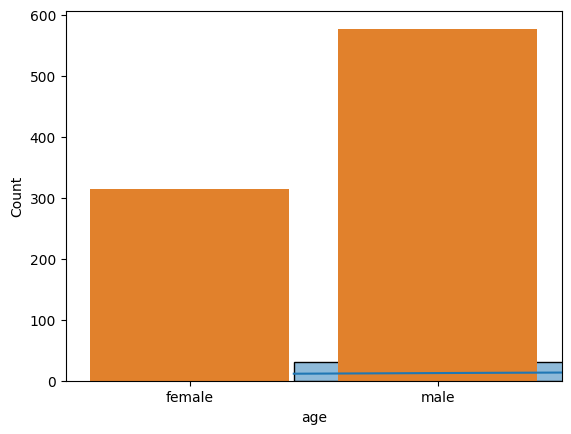

In [12]:
sns.histplot(df['age'], kde=True)
sns.countplot(x='sex', data=df)

<Axes: xlabel='sex', ylabel='survived'>

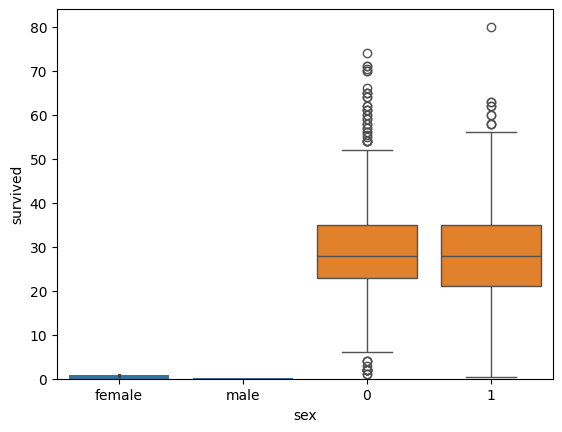

In [13]:
sns.barplot(x='sex', y='survived', data=df)
sns.boxplot(x='survived', y='age', data=df)

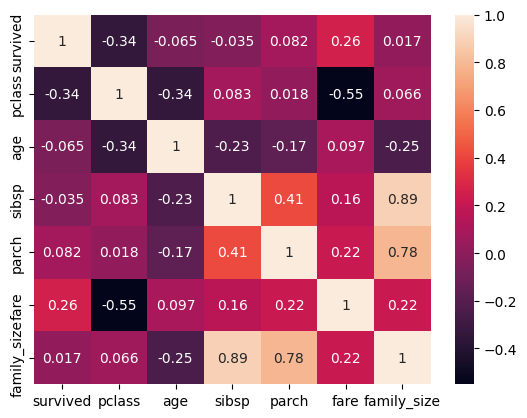

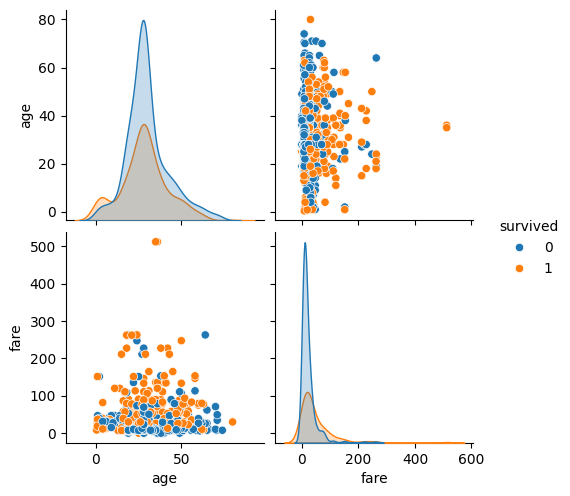

In [15]:
# Select only numerical columns for correlation and pairplot
numerical_df = df.select_dtypes(include=np.number)

sns.heatmap(numerical_df.corr(), annot=True)
sns.pairplot(numerical_df[['age', 'fare', 'survived']], hue='survived')

In [16]:
- Women had higher survival rate than men.
- Passengers in 1st class had higher survival than 3rd class.
- Fare and survival positively correlated.
- Age had a small effect; younger passengers survived more.

SyntaxError: invalid decimal literal (ipython-input-3579412357.py, line 2)